In [81]:
import pandas as pd
import numpy as np

In [82]:
from pandas_datareader import data as wb

In [83]:
import matplotlib.pyplot as plt

In [84]:
PG = wb.DataReader('PG', data_source = 'quandl', start="1995-1-1", end='2018-05-01')

In [85]:
PG.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,76.53,78.44,76.300,77.79,11257559.0,0.0,1.0,76.53,78.44,76.300,77.79,11257559.0
2018-03-26,76.57,76.87,76.020,76.41,11959444.0,0.0,1.0,76.57,76.87,76.020,76.41,11959444.0
2018-03-23,76.79,77.18,75.805,75.91,11626422.0,0.0,1.0,76.79,77.18,75.805,75.91,11626422.0
2018-03-22,76.83,77.52,76.370,76.41,10396180.0,0.0,1.0,76.83,77.52,76.370,76.41,10396180.0
2018-03-21,78.05,78.24,76.880,77.04,9776002.0,0.0,1.0,78.05,78.24,76.880,77.04,9776002.0


In [86]:
PG.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
1995-01-09,61.38,61.63,60.75,60.88,448800.0,0.0,1.0,8.880469,8.916639,8.789320,8.808129,1795200.0
1995-01-06,60.63,61.63,60.63,61.25,859500.0,0.0,1.0,8.771959,8.916639,8.771959,8.861660,3438000.0
1995-01-05,61.50,61.75,60.88,61.00,579900.0,0.0,1.0,8.897830,8.934000,8.808129,8.825490,2319600.0
1995-01-04,62.63,62.63,61.25,61.88,554700.0,0.0,1.0,9.061319,9.061319,8.861660,8.952809,2218800.0
1995-01-03,61.88,62.50,61.75,62.38,829600.0,0.0,1.0,8.952809,9.042510,8.934000,9.025149,3318400.0


In [87]:
PG['simple_reture'] = (PG['AdjClose']/PG['AdjClose'].shift(-1))-1

In [88]:
print (PG['simple_reture'])


Date
2018-03-27    0.018060
2018-03-26    0.006587
2018-03-23   -0.006544
2018-03-22   -0.008178
2018-03-21   -0.016218
2018-03-20   -0.004450
2018-03-19   -0.003926
2018-03-16    0.003813
2018-03-15   -0.004177
2018-03-14   -0.009032
2018-03-13   -0.001753
2018-03-12   -0.005356
2018-03-09    0.004002
2018-03-08    0.010232
2018-03-07   -0.010747
2018-03-06   -0.003363
2018-03-05    0.009937
2018-03-02    0.010165
2018-03-01    0.002292
2018-02-28   -0.025081
2018-02-27   -0.013353
2018-02-26    0.007156
2018-02-23    0.002598
2018-02-22    0.007478
2018-02-21   -0.013523
2018-02-20   -0.015254
2018-02-16    0.002306
2018-02-15    0.021443
2018-02-14   -0.010061
2018-02-13    0.002090
                ...   
1995-02-13    0.005802
1995-02-10   -0.001981
1995-02-09    0.000000
1995-02-08   -0.011299
1995-02-07   -0.001805
1995-02-06    0.023077
1995-02-03    0.009630
1995-02-02    0.007827
1995-02-01   -0.020996
1995-01-31   -0.007605
1995-01-30    0.015444
1995-01-27    0.025661
1995-0

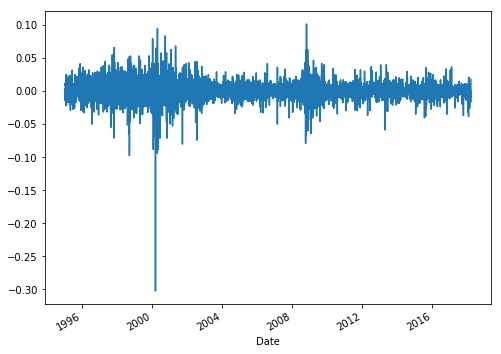

In [89]:
PG['simple_reture'].plot(figsize=(8,6))

In [90]:
avg_reture_d = PG['simple_reture'].mean()

In [91]:
avg_reture_d

0.0004700634230250144

In [92]:
avg_reture_a = PG['simple_reture'].mean() * 250

In [93]:
avg_reture_a

0.11751585575625359

In [94]:
print(str(round(avg_reture_a,5)*100)+'%')

11.752%


In [95]:
PG['log_return']=np.log(PG['AdjClose']/PG['AdjClose'].shift(-1))

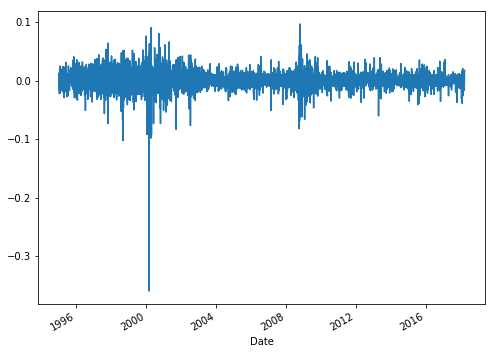

In [96]:
PG['log_return'].plot(figsize=(8,6))

In [97]:
avg_reture_log = PG['log_return'].mean()*250

In [98]:
print(str(round(avg_reture_log,5)*100)+'%')

9.208%


In [99]:
tickers = ['PG', 'MSFT', 'F','GE']

In [100]:
mydata = pd.DataFrame()

In [101]:
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='quandl', start='1995-1-1')['AdjClose']

In [102]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5849 entries, 2018-03-27 to 1995-01-03
Data columns (total 4 columns):
PG      5849 non-null float64
MSFT    5849 non-null float64
F       5849 non-null float64
GE      5849 non-null float64
dtypes: float64(4)
memory usage: 228.5 KB


In [103]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2018-03-27,77.79,89.47,10.83,13.44
2018-03-26,76.41,93.78,10.83,12.89
2018-03-23,75.91,87.18,10.56,13.07
2018-03-22,76.41,89.79,10.75,13.35
2018-03-21,77.04,92.48,11.10,13.88


In [104]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
1995-01-09,8.808129,2.506743,4.948832,4.442732
1995-01-06,8.861660,2.522554,4.863123,4.486824
1995-01-05,8.825490,2.480948,4.863123,4.508870
1995-01-04,8.952809,2.522554,4.905978,4.497406
1995-01-03,9.025149,2.504247,4.777414,4.497406


In [105]:
mydata.iloc[0]

PG      77.79
MSFT    89.47
F       10.83
GE      13.44
Name: 2018-03-27 00:00:00, dtype: float64

In [106]:
mydata.iloc[-1]

PG      9.025149
MSFT    2.504247
F       4.777414
GE      4.497406
Name: 1995-01-03 00:00:00, dtype: float64

In [107]:
df2 = (mydata/mydata.iloc[-1]*100)

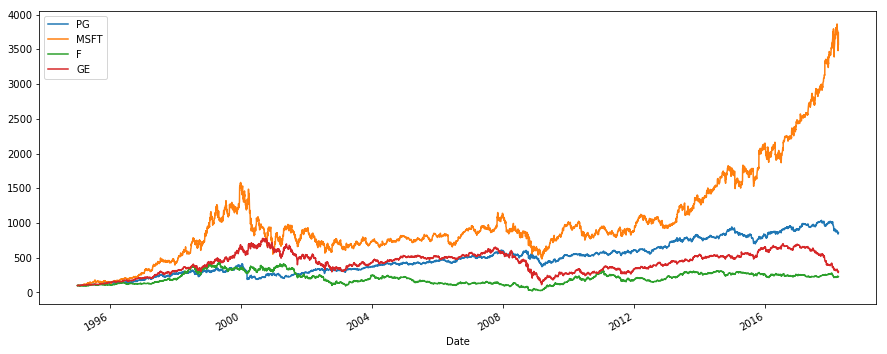

In [108]:
df2.plot(figsize=(15,6))

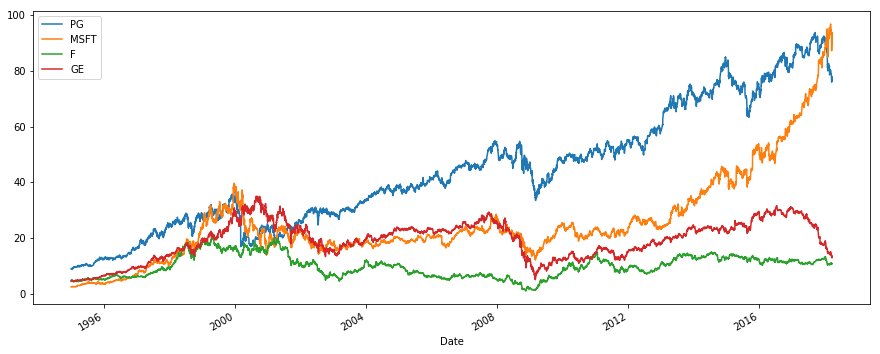

In [109]:
mydata.plot(figsize=(15,6))

In [110]:
returns = (mydata/mydata.shift(-1))-1

In [111]:
returns.head()

,PG,MSFT,F,GE
Date,,,,
2018-03-27,0.018060,-0.045959,0.000000,0.042669
2018-03-26,0.006587,0.075705,0.025568,-0.013772
2018-03-23,-0.006544,-0.029068,-0.017674,-0.020974
2018-03-22,-0.008178,-0.029087,-0.031532,-0.038184
2018-03-21,-0.016218,-0.006979,0.010009,0.017595


In [112]:
weights = np.array([0.25,0.25,0.25,0.25])

In [113]:
np.dot(returns,weights)

array([ 0.00369264,  0.02352209, -0.01856492, ..., -0.00922517,
        0.00655136,         nan])

In [114]:
annual_returns = returns.mean()*250

In [115]:
np.dot(annual_returns, weights)

0.13118411098159546

In [126]:
pfolio_1 = str( round(np.dot(annual_returns,weights*100),3) )   +'%'

In [127]:
print(pfolio_1)

13.118%


In [129]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [130]:
pfolio_2 = str( round(np.dot(annual_returns,weights_2*100),3) )   +'%'

In [131]:
print(pfolio_2)

14.982%
